# I. Introduction aux Probabilités et Statistiques

In [1]:
from IPython.display import HTML, Image
import pandas as pd
data = pd.read_csv("data/data.csv")
data.head(3)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00


## –– Sommaire

### A. Introduction aux probabilités

• Concept de probabilité  
• Théorème de Bayes

### B. Introduction aux statistiques

• Moyenne, Médiane, Mode  
• Espérance, Variance, Écart-type  
• Skewness et Kurtosis  
• Biais, Poids et Degrés de liberté  
• Fréquences  
• Théorème Central Limite

### C. Concepts mathématiques

• Dérivées et Intégrales  
• Convexité et Concavité  
• Descente de gradient  
• Boosting, bagging   

---

## A. Introduction aux probabilités

https://openclassrooms.com/fr/courses/4525296-maitrisez-les-bases-des-probabilites

## test
$$\mathbb{P}(A \cup B) = \mathbb{P}(A) + \mathbb{P}(B)$$

Petite demonstration du phénomène par notre ami <mark>Cédric Villani</mark> lors de sa conférence TED "What's so sexy about math?".

In [2]:
HTML('<iframe width="400" height="255" src="https://www.youtube.com/embed/Kc0Kthyo0hU?start=250" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

## B. Introduction aux statistiques

$\sum$ : la somme de  
$x_i$ : une valeur de la série statistique  
$n$ : l'effectif

### –– Moyenne $\mu$

Il existe différentes moyennes, mais quand on parle de moyenne, il s'agit toujours de la moyenne arithmétique.
La moyenne arithmétique (noté $\mu$) est égale à la somme de toutes les valeurs par le nombre de ces valeurs (l'effectif total).

$\mu=\dfrac{\sum{x_i}}{n}$  

In [31]:
print("La moyenne des objectifs fixés (en USD) est de ")
print(data['usd_goal_real'].mean())

La moyenne des objectifs fixés (en USD) est de 
45454.40146545336


### –– Médiane

La médiane est la valeur centrale d’une série statistique — la moitié des observations lui sont inférieures ou égales et la moitié des observations lui sont supérieures ou égales.

In [5]:
print(data['usd_goal_real'].median())

5500.0


### –– Mode

Le mode pour un caractère discret est la valeur du caractère qui correspond à l'effectif le plus grand. Pour un caractère continu, on parle de classe modale. Le mode est pertinent lorsque dans la série, certaines valeurs sont répétées plusieurs fois. Il peut y avoir aucun, un seul ou plusieurs modes lorsque la distribution est dite *plurimodale*.

In [6]:
print(data['usd_goal_real'].mode())

0    5000.0
dtype: float64


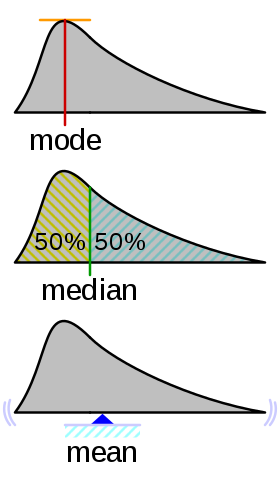

In [9]:
Image(filename='img/medmoymod.png', width="200")

### –– Variance $Var$

$Var = {\dfrac{\sum\limits_{i=1}^{n}{{\lvert x_i-\mu\rvert^2}}}{n}}$

In [39]:
print(data['backers'].var(ddof=0))

822982.5139464174


### –– Ecart-type (std) $σ$

$σ = \sqrt{Var} = \sqrt{\dfrac{\sum\limits_{i=1}^{n}{{\lvert x_i-\mu\rvert^2}}}{n}}$

In [37]:
print(data['backers'].std(ddof=0))

907.1838369076123


### –– L'écart inter-quartiles (IQR)

$IQR = Q_3 - Q_1$

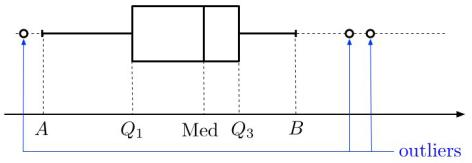

In [41]:
Image(filename='img/boxplot.jpg', width="400")

### –– Fréquence
fréquence d'une modalité = n / N

In [7]:
effectifs = data["main_category"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ["main_category"]) # création du tableau à partir des modalités
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(data) # len(data) renvoie la taille de l'échantillon
tab

,main_category,n,f
0,Film & Video,63585,0.167921
1,Music,51918,0.137109
2,Publishing,39874,0.105303
3,Games,35231,0.093041
4,Technology,32569,0.086011
5,Design,30070,0.079411
6,Art,28153,0.074349
7,Food,24602,0.064971
8,Fashion,22816,0.060254
9,Theater,10913,0.028820


In [8]:
tab = tab.sort_values("main_category") # tri des valeurs de la variable X (croissant)
tab["F"] = tab["f"].cumsum() # cumsum calcule la somme cumulée
tab

,main_category,n,f,F
6,Art,28153,0.074349,0.074349
10,Comics,10819,0.028572,0.102921
12,Crafts,8809,0.023264,0.126184
14,Dance,3768,0.009951,0.136135
5,Design,30070,0.079411,0.215546
8,Fashion,22816,0.060254,0.275801
0,Film & Video,63585,0.167921,0.443721
7,Food,24602,0.064971,0.508692
3,Games,35231,0.093041,0.601733
13,Journalism,4755,0.012557,0.614291


### –– Biais, Poids, Degrés de liberté

$$Var(\hat{f}(x)) = E(\hat{f}(x)^2)-E(\hat{f}(x))^2$$

$$Biais(\hat{f}(x)) = E(\hat{f}(x) - f(x))$$

$$Err(x) = Biais^2 + Var + ErreurIrréductible$$